# Infectious Disease Model - Assignment 9

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Parameters
N = 7900000  # Total population
I0 = 10 / N  # Initial proportion of infected individuals
S0 = 1 - I0  # Initial proportion of susceptible individuals
R0 = 0  # Initial proportion of recovered individuals
beta = 1/2  # Rate of infection (contacts per day)
gamma = 1/3  # Rate of recovery (recoveries per day)

In [3]:
# ODEs
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Time vector
t = np.linspace(0, 365, 365)  # 365 days

# Integrate the SIR ODEs over time t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

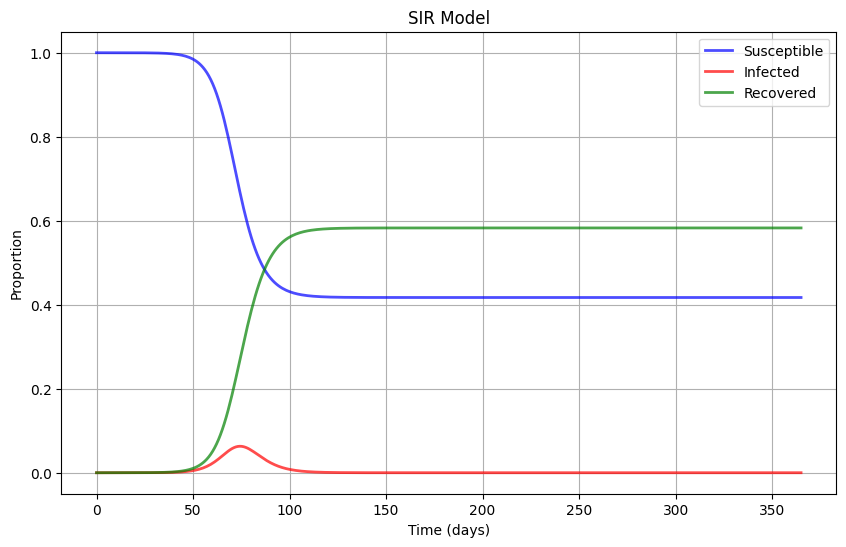

Time before the proportion of infected people peaks: 74.2032967032967 days


In [4]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Proportion')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()

# Find out the time in days before the proportion of infected people peak
peak_index = np.argmax(I)
peak_time = t[peak_index]
print("Time before the proportion of infected people peaks:", peak_time, "days")